In [63]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [65]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [66]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [67]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
columns_to_scale = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]
normalize_scaled = scaler.fit_transform(df_market_data[columns_to_scale])

In [68]:
# Create a DataFrame with the scaled data

column_mapping = {
    i: col for i, col in enumerate([
        'price_change_percentage_24h',
        'price_change_percentage_7d',
        'price_change_percentage_14d',
        'price_change_percentage_30d',
        'price_change_percentage_60d',
        'price_change_percentage_200d',
        'price_change_percentage_1y'
    ])
}

normalize_scaled_df = pd.DataFrame(normalize_scaled, columns=[col for col in column_mapping.values()])

# Copy the crypto names from the original data
# scaled_df['coin_id'] = df_market_data['coin_id']

normalize_scaled_df.insert(0, 'coin_id', df_market_data.index)

# Set the coinid column as index
# scaled_df.set_index('coinid', inplace=True)

normalize_scaled_df.set_index('coin_id', inplace=True)

# Display sample data
normalize_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [69]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))

In [70]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=0,n_init='auto')
    k_model.fit(normalize_scaled_df)
    inertia.append(k_model.inertia_)

c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMe

In [71]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data={'k':k_values,'inertia':inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow=pd.DataFrame(elbow_data)

In [72]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plot_elbow=df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow curve',
    xticks=k_values
)
df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


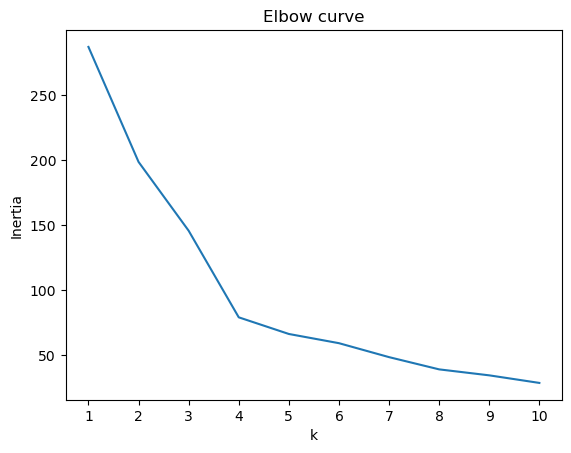

In [73]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the inertia values against the k values
ax.plot(k_values, df_elbow['inertia'])

# Set the title and labels
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.set_ylabel('Inertia')

# Set the x-ticks to the k values
ax.set_xticks(k_values)

# Show the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [74]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=4,random_state=0)

In [75]:
# Fit the K-Means model using the scaled data
model.fit(normalize_scaled_df)

c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values=model.predict(normalize_scaled_df)

# Print the resulting array of cluster values.
cluster_values

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [77]:
# Create a copy of the DataFrame
cluster_values_df= normalize_scaled_df.copy()

In [78]:
# Add a new column to the DataFrame with the predicted clusters
cluster_values_df['cluster_predictions']=cluster_values

# Display sample data
cluster_values_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [61]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
org_scatter=cluster_values_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster_predictions',
    hover_cols=['coin_id']
)
cluster_values

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [79]:
hvplot.extension('bokeh')

cluster_values_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster_predictions',
    hover_cols=['coin_id']
)

:NdOverlay   [cluster_predictions]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [80]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [81]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components=pca.fit_transform(normalize_scaled)
# View the first five rows of the DataFrame. 
pca_components[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [82]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
variance=pca.explained_variance_ratio_
sum_variance=variance.sum()
sum_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The output 0.895031657030984 signifies that the three principal components extracted using PCA explain approximately 89.5% of the total variance present in the original dataset. This is a significant amount of variance captured, suggesting that PCA effectively reduced the dimensionality while preserving most of the important information.

In [97]:
# Create a new DataFrame with the PCA data.
pca_df=pd.DataFrame(pca_components,columns=['PC1','PC2','PC3'])
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [85]:
# Create a list with the number of k-values from 1 to 11
k_values_best_values = list(range(1,11))


In [86]:
# Create an empty list to store the inertia values
inertia_best_value=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_values_best_values:
    df_market_data_pca = KMeans(n_clusters=i, random_state=0,n_init='auto')
    df_market_data_pca.fit(pca_df)
    inertia.append(df_market_data_pca.inertia_)

c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMe

In [87]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = [{'k': k, 'inertia': inertia} for k, inertia in zip(k_values_best_values, inertia)]

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


In [88]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot=elbow_df.hvplot.line(
    x='k',
    y='inertia',
    title='elbow curve',
    xticks=k_values_best_values
) 
elbow_pca_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** For 'k' value is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It doesn't differ 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [89]:
# Initialize the K-Means model using the best value for k
model_k_means=KMeans(n_clusters=4, random_state=0)

In [90]:
# Fit the K-Means model using the PCA data
model_k_means.fit(pca_df)

c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Priscy\anaconda3\envs\dev1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [91]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters=model_k_means.predict(pca_df)

# Print the resulting array of cluster values.
pca_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [92]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy= pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster_predictions']=pca_clusters

# Display sample data
pca_df_copy.head()

,PC1,PC2,PC3,cluster_predictions
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [93]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_scatter=pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster_predictions',
    title='Scatter Plot',
    hover_cols='coin_id'
)
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [94]:
# Composite plot to contrast the Elbow curves
comp_elbow=plot_elbow+elbow_pca_plot

In [95]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
comp_plot=org_scatter+pca_scatter

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  The code snippet demonstrates how to use PCA to reduce the dimensionality of data while retaining a significant portion of the original information. The output of the code shows the transformed data and the proportion of variance explained by each principal component.